In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Banking_Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.dropna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.replace({"Female":1, "Male":2}, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,2,39,5,0.00,2,1,0,96270.64,0
9996,516,France,2,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,2,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df = pd.get_dummies(data=df, columns=["Geography"])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,2,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,2,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,2,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [7]:
scaler = MinMaxScaler()
cols_to_scale = ["Age", "Balance", "EstimatedSalary"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0
1,608,1,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1
2,502,1,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0
3,699,1,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,850,1,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,2,0.283784,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,516,2,0.229730,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,709,1,0.243243,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,772,2,0.324324,3,0.299226,2,1,0,0.464429,1,0,1,0


In [8]:
Y = df["Exited"]
X = df.drop("Exited", axis=1)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(12,)),
    keras.layers.Dense(26, input_shape=(12,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
282/282 [==============================] - 1s 2ms/step - loss: 0.9099 - accuracy: 0.7391
Epoch 2/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7829
Epoch 3/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.7917
Epoch 4/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7926
Epoch 5/100
282/282 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7918
Epoch 6/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7973
Epoch 7/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7972
Epoch 8/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7987
Epoch 9/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7968
Epoch 10/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4626 - accura

282/282 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7973
Epoch 82/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.8018
Epoch 83/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8067
Epoch 84/100
282/282 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.8020
Epoch 85/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.8034
Epoch 86/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.8031
Epoch 87/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4738 - accuracy: 0.8004
Epoch 88/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7980
Epoch 89/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4567 - accuracy: 0.8003
Epoch 90/100
282/282 [==============================] - 1s 2ms/step - loss: 0.4499 - accuracy: 

In [11]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.7990


[0.4537983238697052, 0.7990000247955322]

In [12]:
yp = model.predict(X_test)
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

32/32 [==============================] - 0s 1ms/step


In [13]:
Y_test[:10]

167     0
7269    1
9366    0
3556    1
1048    0
9978    0
219     1
7567    1
9291    0
8481    0
Name: Exited, dtype: int64

In [14]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

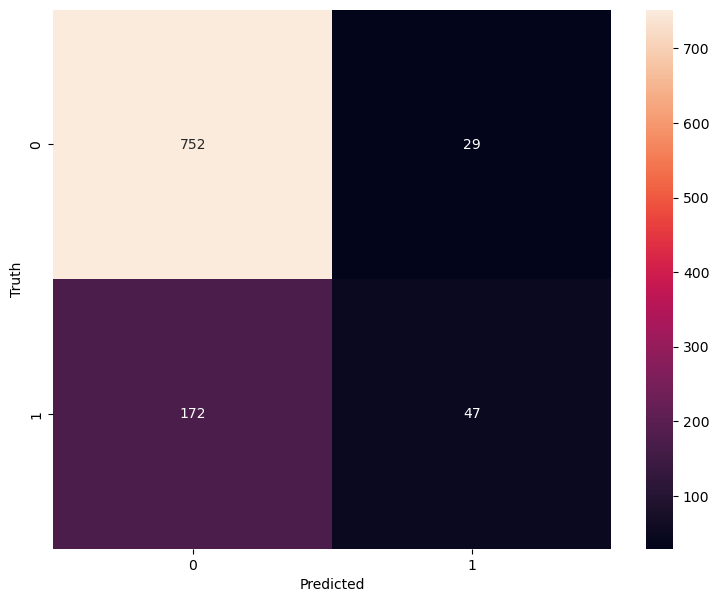

In [15]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)

plt.figure(figsize = (9,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()